Name : Komal T Behera

Subject : Numyard Data Science Internship Task

Dataset : Mushroom Classification from Kaggle 

In [126]:
#imorting the libraries
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

#for data pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#for model building,saving, and finding best models : 
from sklearn.model_selection import train_test_split,cross_val_score
import yaml
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

#importing 10 ML classification Algortihms
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



I have created a class which includes functions for Exploratory Data Analysis, Visualization, Training, Testing and Output prediction

The hyperparameters for various ML Algorithm's have been mentioned in the YAML file

In [135]:
class Mushrooms:
    
    def __init__(self,model_number=None,print_stm=False):
        
        path=r"C:\Users\dell\Desktop\projects\Machine Learning\Numyard\config.yaml"
        try: 
            with open (path, 'r') as file:
                self.config = yaml.safe_load(file)
        except Exception as e:
            print('Error reading the config file')
         
        self.print_stm=print_stm
        self.verbose=self.config['verbose']     
        
        self.model_number=model_number
        
        self.model_save_path=self.config['model_save_path']
        
        self.dataset=pd.read_csv(self.config['dataset']['path'])
        
        #splitting the dataset into x and y values:
        self.x, self.y= self.separate_x_y()
        
        #Label Encoding for categorical variables :
        self.x,self.y=self.label_encoding()
               
        #splitting train & test data
        self.x_train,self.y_train,self.x_test,self.y_test=self._split_data()
        
        #compute for any missing values
        self.compute_missing()
    
    def data_visualization(self):
        print("Check if data is balanced or not : ")
        dataset=self.dataset
        #p=poisonous, e=edible
        plt.style.use('dark_background')
        plt.rcParams['figure.figsize']=8,8 
        s = sns.countplot(x = "class", data = dataset)
        for p in s.patches:
            s.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',  xytext = (0, 9), textcoords = 'offset points')
        
        plt.show()
        
        print("From the below graph's we can see how many mushrooms belong to each category in each feature")
        features = dataset.columns
        f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
        k = 1
        for i in range(0,22):
            s = sns.countplot(x = features[k], data = dataset, hue = 'class', ax=axes[i], palette = 'CMRmap')
            axes[i].set_xlabel(features[k], fontsize=20)
            axes[i].set_ylabel("Count", fontsize=20)
            axes[i].tick_params(labelsize=15)
            axes[i].legend(loc=2, prop={'size': 20})
            k = k+1
        for p in s.patches:
            s.annotate(format(p.get_height(), '.1f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', 
            xytext = (0, 9), 
            fontsize = 15,
            textcoords = 'offset points')
        
    def separate_x_y(self):
        dataset=self.dataset
        x=dataset.iloc[:,1:]
        y=dataset.iloc[:,0]
        
        return x,y
    
    def _split_data(self):
        
        x,y=self.x,self.y
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=self.config['dataset']['test_size'],random_state=self.config['random_state'])
        
        if self.verbose and self.print_stm :
            print("x_train shape :",x_train.shape)
            print("y_train shape :",y_train.shape)
            print("x_test shape :",x_test.shape)
            print("y_test shape :",y_test.shape)
        return x_train,y_train,x_test,y_test
    
    def compute_missing(self):
        dataset=self.dataset
        vals=dataset.isna().sum()
        list_missing_vals=[]
        no_missing=True
        for i in vals:
            if(i!=0):
                list_missing_vals.append[dataset.columns[i]]
                no_missing=False
                
        if(no_missing==False):
            imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            imp.fit_transform(dataset)
                
    def label_encoding(self):
        x,y=self.x,self.y
        #label encoding for y-values
        le = LabelEncoder()
        y = le.fit_transform(y) 
        
        #One-hot encoding for x-values
        onehotencoder = OneHotEncoder()
        x = onehotencoder.fit_transform(x).toarray()
        
        if self.verbose and self.print_stm :
            print("The encodings for y labels : ", y)
            print("The one-hot encodings for first feature variables ie x labels :",x[0])
         
        return x,y    
    
    def select_model(self):
        n=self.model_number
        if(n==1):
            self.clf=MultinomialNB()
        elif(n==2):
            self.clf=DecisionTreeClassifier(criterion=self.config['model']['decision_tree']['criterion'])
        elif(n==3):
            self.clf=RandomForestClassifier(n_estimators=self.config['model']['random_forest']['n_estimators'])    
        elif(n==4):
            self.clf=GradientBoostingClassifier(n_estimators=self.config['model']['gradient_boost']['n_estimators'],
                                                criterion=self.config['model']['gradient_boost']['criterion'])
        elif(n==5):
            self.clf=ExtraTreesClassifier(n_estimators=self.config['model']['extra_tree']['n_estimators'],criterion=
                                         self.config['model']['extra_tree']['criterion'],max_depth=self.config['model']['extra_tree']['max_depth'])
        elif(n==6):
            self.clf=KNeighborsClassifier(n_neighbors=self.config['model']['knn']['n_neighbors'])
        elif(n==7):
            self.clf=LogisticRegression(penalty=self.config['model']['logistic_regression']['penalty'],
                                        solver=self.config['model']['logistic_regression']['solver'])
        elif(n==8):
            self.clf=SVC(C=self.config['model']['svm']['C'],kernel=self.config['model']['svm']['kernel'],
                         gamma=self.config['model']['svm']['gamma'])
        elif(n==9):
            self.clf=MLPClassifier(hidden_layer_sizes=self.config['model']['mlp']['hidden_layer_sizes'],
                                                                                  activation=self.config['model']['mlp']['activation'])
        elif(n==10):    
            self.clf=RidgeClassifier()
        
        return self.clf
    
    def train_model(self):
        #getting the dataset for training & testing purposes
        x_train,y_train,x_test,y_test=self.x_train,self.y_train,self.x_test,self.y_test
        
        
        #getting the classifier
        classifier=self.select_model()
        
        # Training the Model
        classifier = classifier.fit(x_train, y_train)
        
        filename=self.config['model_save_path'] + str(self.model_number)
        joblib.dump(classifier, filename + ".joblib")
        
        return classifier
        
    def predict_op(self):
        try:
            # Load Trained Model
            filename=self.config['model_save_path'] + str(self.model_number)
            clf = joblib.load(filename +  ".joblib")
        except Exception as e:
            print("Model not found...")
        
        #using the predict function to get test values
        result=clf.predict(self.x_test)
        
        accuracy = accuracy_score(self.y_test, result)
        clf_report = classification_report(self.y_test, result)
        
        cf_matrix=confusion_matrix(self.y_test, result)
        
        return accuracy,clf_report,cf_matrix


press 1 for Multinomial Naive Bayes Classifier
press 2 for Decision Tree Classifier 
press 3 for Random Forest Classifier 
press 4 for Gradient Boosting Classifier 
press 5 for Extra Trees Classifier
press 6 for KNN
press 7 for Logistic Regression
press 8 for SVM Classifier 
press 9 for MultiLayer Perceptron Classifier
press 10 for Ridge Classifier
2
Check if data is balanced or not : 


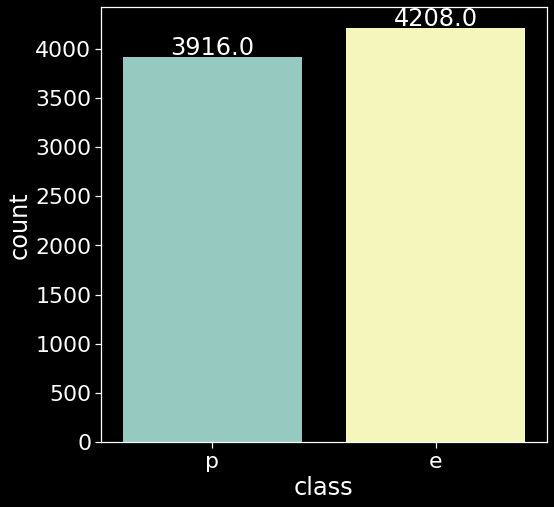

From the below graph's we can see how many mushrooms belong to each category in each feature


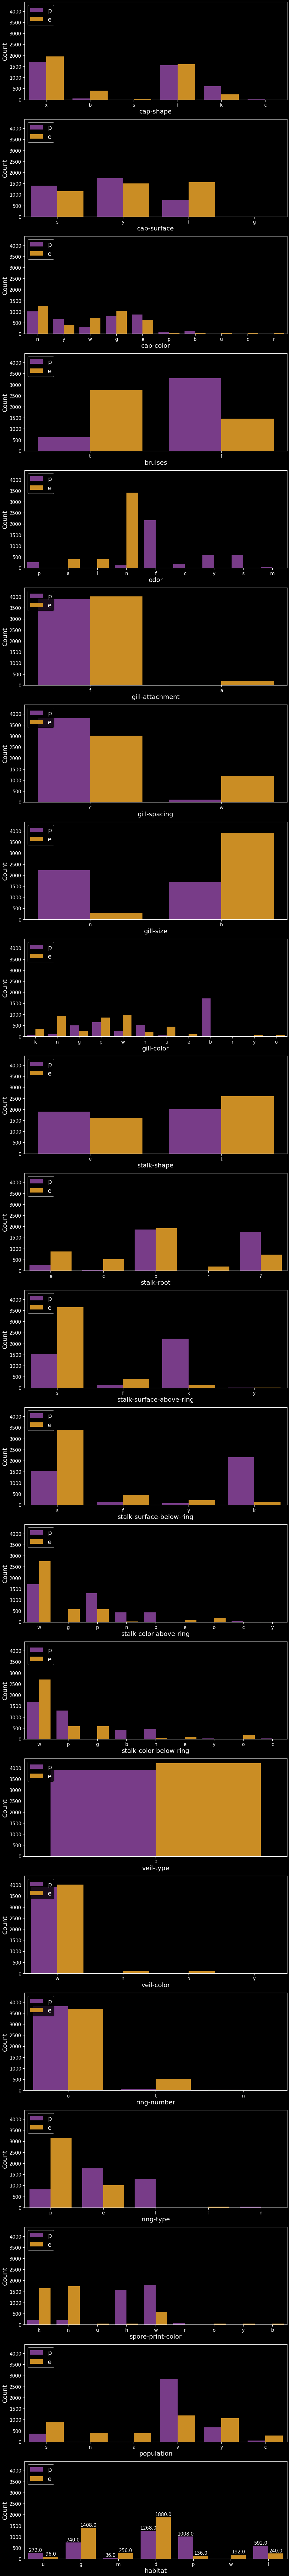

In [138]:
if __name__=='__main__':
    print("press 1 for Multinomial Naive Bayes Classifier")
    print("press 2 for Decision Tree Classifier ")
    print("press 3 for Random Forest Classifier ")
    print("press 4 for Gradient Boosting Classifier ")
    print("press 5 for Extra Trees Classifier")
    print("press 6 for KNN")
    print("press 7 for Logistic Regression")
    print("press 8 for SVM Classifier ")
    print("press 9 for MultiLayer Perceptron Classifier")
    print("press 10 for Ridge Classifier")
    
    n=int(input())

    my_model=Mushrooms(model_number=n)
    _=my_model.train_model()
    acc,clf_report,confusion=my_model.predict_op()
    my_model.data_visualization()
   

In [113]:
print(acc)
print(clf_report)
print(confusion)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

[[1258    0]
 [   0 1180]]


In [114]:
classifiers=["Multinomial Naive Bayes Classifier","Decision Tree Classifier ","Random Forest Classifier ",
            "Gradient Boosting Classifier ","Extra Trees Classifier","KNN","Logistic Regression", "SVM Classifier ",
            "MultiLayer Perceptron Classifier","Ridge Classifier"]
for n in range(0,10):
    my_model=Mushrooms(model_number=n+1)
    acc,clf_report,confusion=my_model.predict_op()
    print("Model Name :",classifiers[n])
    print("accuracy :",acc*100)
    print("classification report :")
    print(clf_report)
    print("Confusion Matrix :")
    print(confusion)
    print("________________________________________________")
    

Model Name : Multinomial Naive Bayes Classifier
accuracy : 95.32403609515997
classification report :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1258
           1       0.99      0.91      0.95      1180

    accuracy                           0.95      2438
   macro avg       0.96      0.95      0.95      2438
weighted avg       0.96      0.95      0.95      2438

Confusion Matrix :
[[1245   13]
 [ 101 1079]]
________________________________________________
Model Name : Decision Tree Classifier 
accuracy : 100.0
classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix :
[[1258    0]
 [   0 1180]]
________________________

From the above observations, we can conclude that the best algorithm's are : Ridge Classifier, Multi-layer Perceptron, Logistic Regression, KNN, Extra Trees, Gradient Boosting Classifer, Random Forest Classifier and Decision Trees

Thus an ensemble of these algorithms will be the best choice for this particular Classification Problem 